In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import kaleido
import plotly.io as pio

In [3]:
plot_folder = '/Users/eddie/cs163/src/Plots'
data_folder = '/Users/eddie/cs163/src/Data'
pio.renderers.default = 'png'

In [6]:
df = pd.read_csv('/Users/eddie/cs163/src/Data/final.csv', index_col=['DATE'], parse_dates=['DATE'])
df.head()

,Frozen Food Manufacturing PPI,Dried and dehydrated Food Manufacturing PPI,Seafood Production and Packaging PPI,Snack Food Manufacturing PPI,Perishable Food Manufacturing PPI,Food and Beverages Retailers PPI,Food and Beverages CPI (target),Civilian workers Total compensation,Private industry workers Total compensation,State and government workers Total compensation,...,FOOD FISH,FRUIT & TREE NUT TOTALS,HORTICULTURE TOTALS,LIVESTOCK TOTALS,POULTRY TOTALS,VEGETABLE TOTALS,Gas Price,Commercial Electricity Price,Industrial Electricity Price,Transportation Electricity Price
DATE,,,,,,,,,,,,,,,,,,,,,
2024-08-01,203.344,295.548,188.611,195.877,151.200,265.056,327.849,3.9,3.6,4.7,...,116.5,168.6,110.7,149.9,200.4,143.0,3.507,13.39,8.72,13.18
2024-07-01,202.018,299.824,187.980,193.219,153.872,266.028,327.488,3.9,3.6,4.7,...,116.6,160.9,110.3,151.4,180.3,154.2,3.600,13.58,8.81,13.15
2024-06-01,203.023,300.106,186.130,193.181,152.267,271.505,326.940,4.1,3.9,4.9,...,116.8,147.6,110.3,149.3,171.8,198.0,3.576,13.07,8.40,12.74
2024-05-01,203.539,299.563,186.005,193.419,150.800,273.049,326.153,4.1,3.9,4.9,...,116.7,118.6,110.3,147.8,161.1,162.9,3.725,12.48,7.88,12.21
2024-04-01,202.809,297.136,187.405,193.618,152.175,270.451,325.706,4.1,3.9,4.9,...,116.8,117.7,110.3,146.1,169.0,174.5,3.733,12.63,7.77,12.43


Text(0.5, 1.0, 'Correlation Matrix')

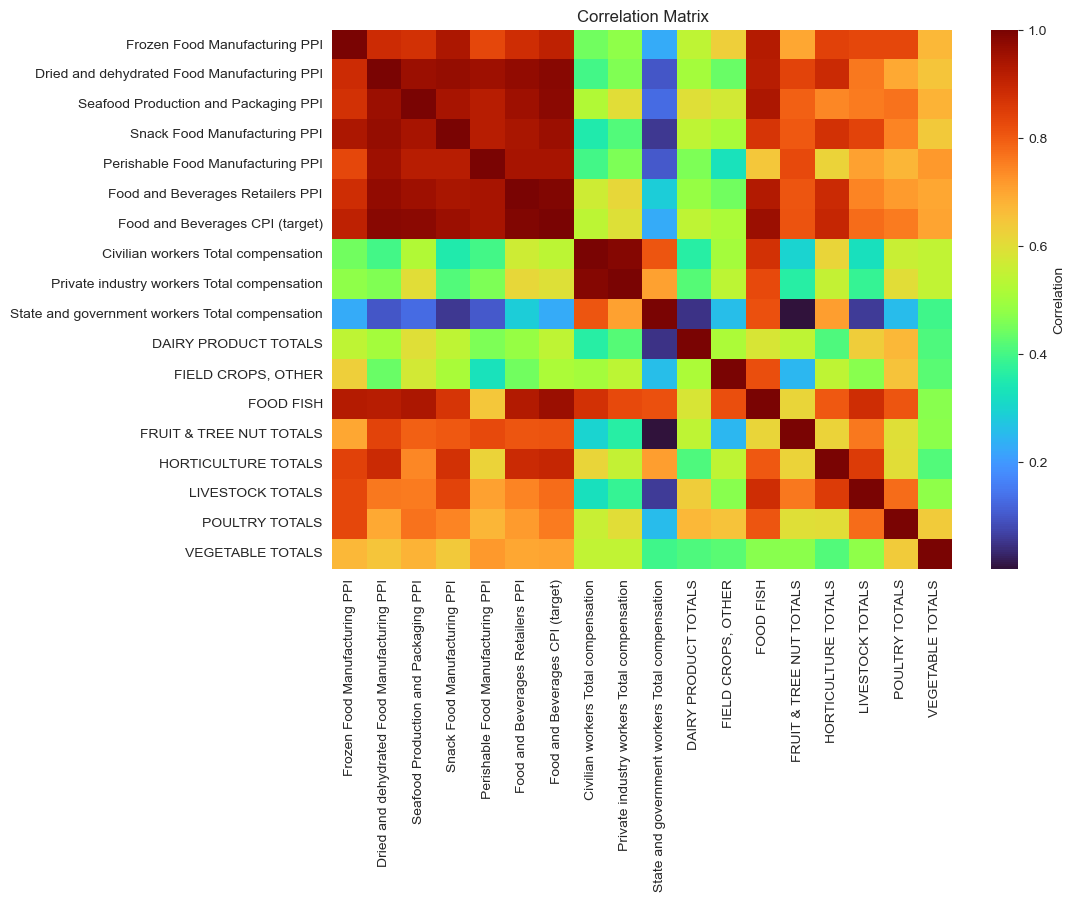

In [11]:
fig = plt.figure(figsize=(10,7))
C = sns.heatmap(df.corr(), cmap='turbo')
cbar = C.collections[0].colorbar
cbar.set_label('Correlation')
plt.title('Correlation Matrix')

Discussion:
- Interestingly, all features has positive correlation to CPI. Most of them have very high correlation (> 0.7). Only a few has low to medium correlation.
- The PPI indices and PRI indices are the ones that are highly correlated. Interestingly, the Dairy products and Field Crops PRI has lower correlation to CPI compared to others PRI indices.

In [12]:
pce = pd.read_csv(os.path.join(data_folder, 'pce.csv'))

In [13]:
pce_melted = pce.melt(id_vars='date', var_name='PCE group', value_vars=['Food and beverages purchased for off-premises consumption', 'Food services and accommodations'], value_name='PCE')

In [14]:
pce_melted = pce_melted.merge(df['Food and Beverages CPI (target)'], left_on='date', right_on=df.index, how='left')

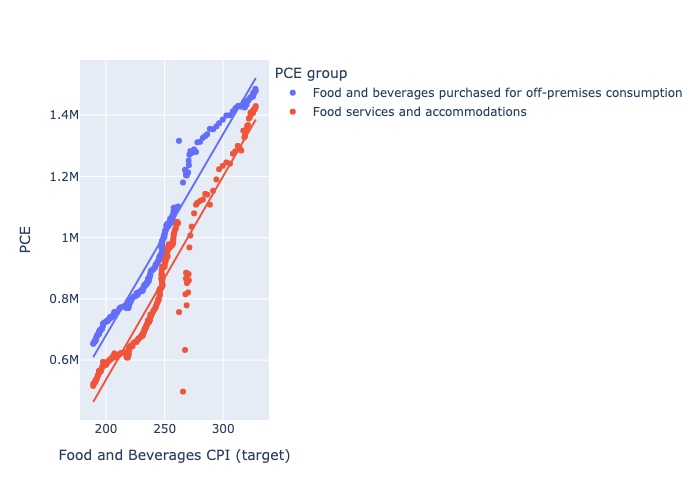

In [15]:
px.scatter(pce_melted, x='Food and Beverages CPI (target)', y='PCE', color='PCE group', trendline='ols')

In [16]:
data = pce.merge(df['Food and Beverages CPI (target)'], left_on='date', right_on=df.index, how='left')
y = data['Food and Beverages CPI (target)']
X = sm.add_constant(data[['Food and beverages purchased for off-premises consumption', 'Food services and accommodations']])
mod = sm.OLS(y, X)
results = mod.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Food and Beverages CPI (target)   R-squared:                       0.970
Model:                                         OLS   Adj. R-squared:                  0.970
Method:                              Least Squares   F-statistic:                     3804.
Date:                             Fri, 25 Oct 2024   Prob (F-statistic):          1.29e-178
Time:                                     21:18:35   Log-Likelihood:                -764.68
No. Observations:                              236   AIC:                             1535.
Df Residuals:                                  233   BIC:                             1546.
Df Model:                                        2                                         
Covariance Type:                         nonrobust                                         
                                                                coef    std err 

In [17]:
df = df.merge(pce, right_on='date', left_on='Timeframe', how='left')

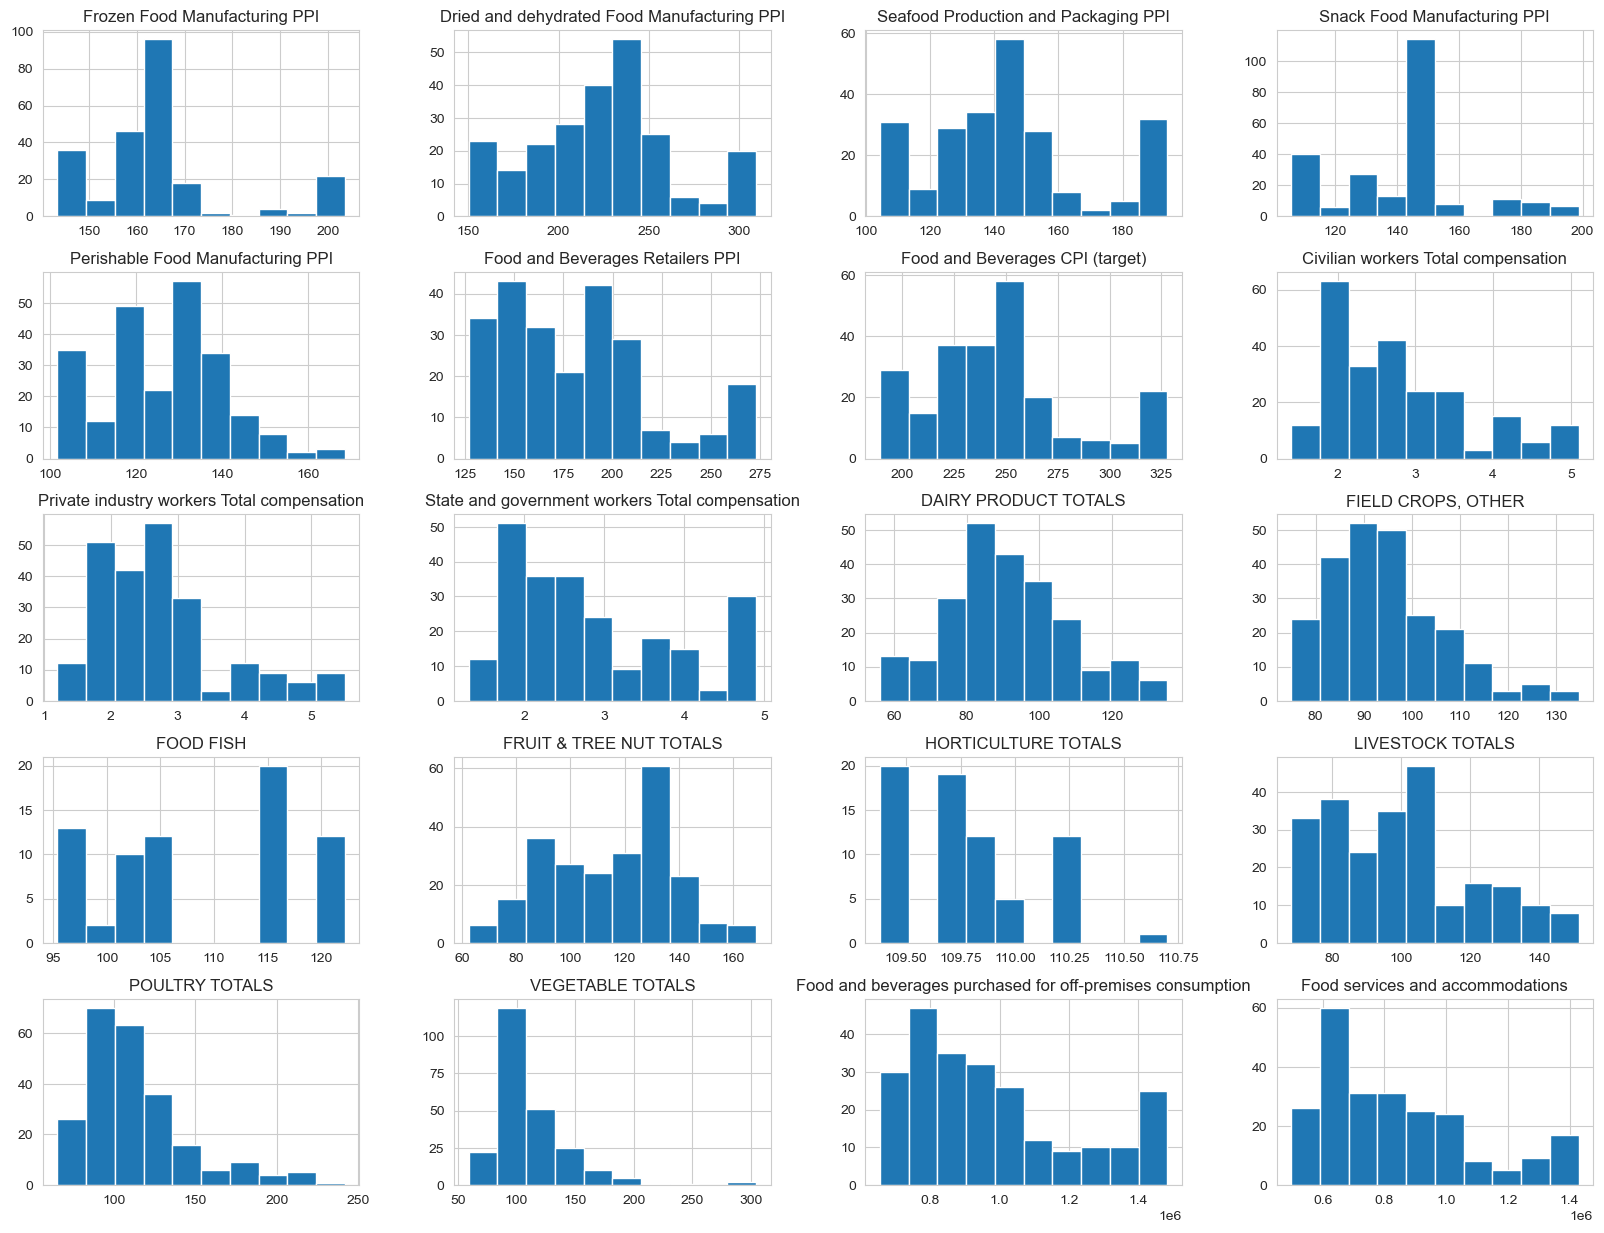

In [18]:
df.hist(figsize=(20,15), grid=True);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Frozen Food Manufacturing PPI                              236 non-null    float64
 1   Dried and dehydrated Food Manufacturing PPI                236 non-null    float64
 2   Seafood Production and Packaging PPI                       236 non-null    float64
 3   Snack Food Manufacturing PPI                               236 non-null    float64
 4   Perishable Food Manufacturing PPI                          236 non-null    float64
 5   Food and Beverages Retailers PPI                           236 non-null    float64
 6   Food and Beverages CPI (target)                            236 non-null    float64
 7   Civilian workers Total compensation                        234 non-null    float64
 8   Private in

In [20]:
# df.drop(columns=['date'], inplace=True)
df.set_index('date', inplace=True)
imputer = KNNImputer(n_neighbors=5)
transformed_data = imputer.fit_transform(df)
df_filled = pd.DataFrame(transformed_data, columns=imputer.get_feature_names_out())
df_filled.index = df.index

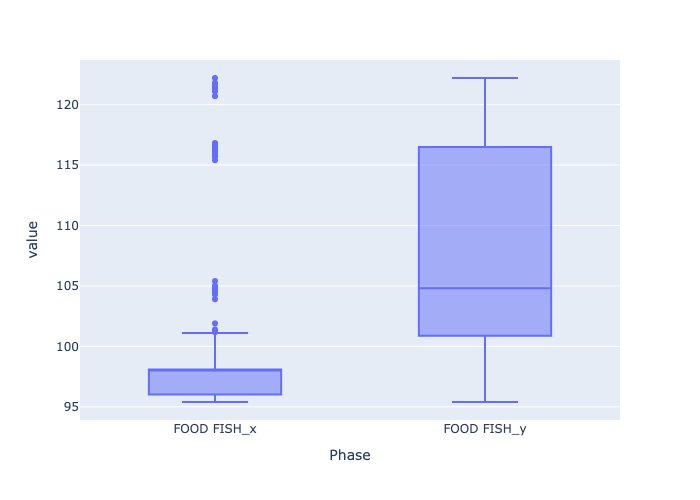

In [21]:
data = df_filled[['FOOD FISH']].merge(df[['FOOD FISH']], on=df.index, how='left').drop(columns=['key_0'])
plot_data = data.melt(value_vars=['FOOD FISH_x', 'FOOD FISH_y'], var_name='Phase')
# data.columns =  ['Food fish pre-filled', 'Food fish post-filled']
px.box(plot_data, x='Phase', y='value')

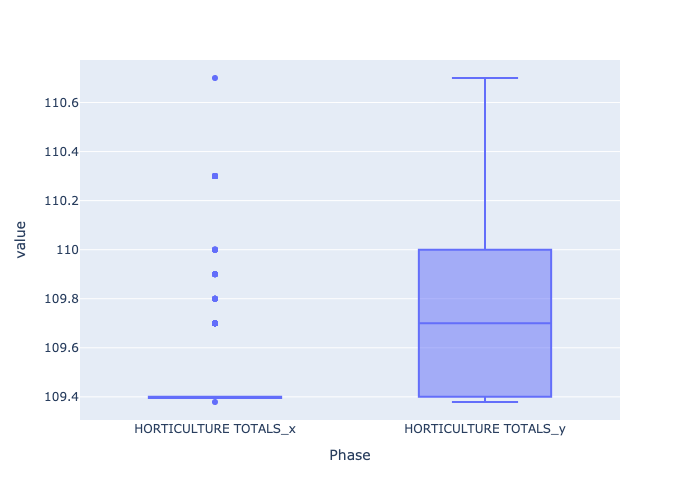

In [22]:
data = df_filled[['HORTICULTURE TOTALS']].merge(df[['HORTICULTURE TOTALS']], on=df.index, how='left').drop(columns=['key_0'])

plot_data = data.melt(value_vars=['HORTICULTURE TOTALS_x', 'HORTICULTURE TOTALS_y'], var_name='Phase')
# data.columns =  ['Food fish pre-filled', 'Food fish post-filled']
px.box(plot_data, x='Phase', y='value')


Discussion: After using the KNN Imputer, Food Fish PRI and Horticulture PRI distribution become nearly normal, which is good enough for further usages.

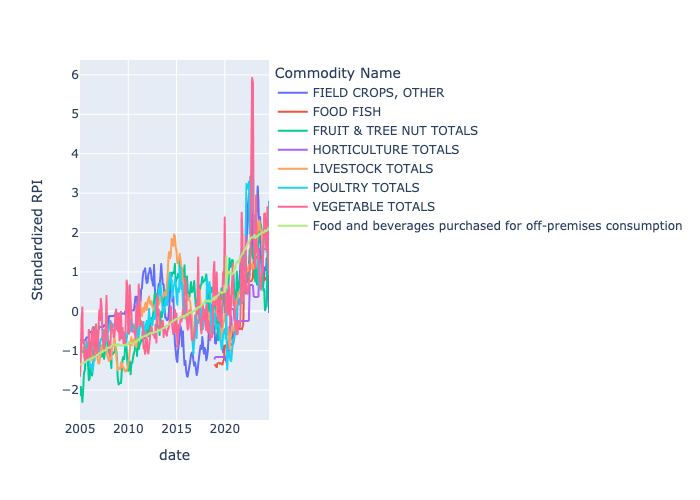

In [23]:
pri_data = df.iloc[:,11:19]
scaler = StandardScaler()
pri_data = pd.DataFrame(scaler.fit_transform(pri_data), columns=pri_data.columns, index=pri_data.index)
pri_data = pri_data.melt(value_name='RPI', value_vars=pri_data.columns, var_name='Commodity', ignore_index=False)
fig = px.line(pri_data, x= pri_data.index, y='RPI', color='Commodity', labels={'RPI': 'Standardized RPI', 'Commodity': 'Commodity Name'})
fig.write_image(os.path.join(plot_folder, 'Commodity RPI.png'), width=1280, height=640)
fig.show()

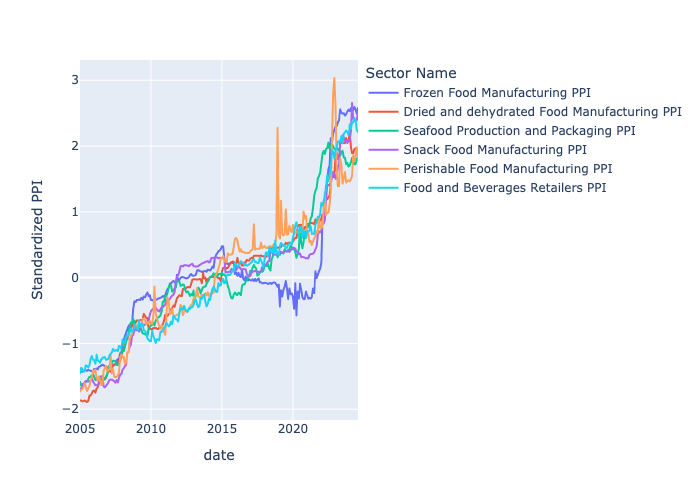

In [24]:
ppi_data = df.iloc[:,0:6]
scaler = StandardScaler()
ppi_data = pd.DataFrame(scaler.fit_transform(ppi_data), columns=ppi_data.columns, index=ppi_data.index)
ppi_data = ppi_data.melt(value_name='PPI', value_vars=ppi_data.columns, var_name='Sector', ignore_index=False)
fig = px.line(ppi_data, x= ppi_data.index, y='PPI', color='Sector', labels={'PPI': 'Standardized PPI', 'Sector': 'Sector Name'})
fig.write_image(os.path.join(plot_folder, 'Commodity PPI.png'), width=1280, height=640)
fig.show()

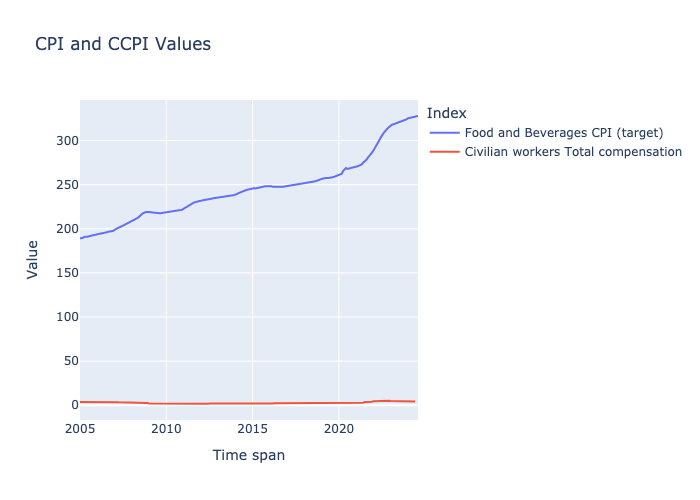

In [25]:
cpi_ccpi = df.iloc[:,6:8]

cpi_ccpi = cpi_ccpi.melt(value_name='Value', var_name = 'Index', value_vars=cpi_ccpi.columns, ignore_index=False)

fig = px.line(cpi_ccpi, x=cpi_ccpi.index, y='Value', color='Index', title='CPI and CCPI Values', labels={'Value': 'Value', 'date': 'Time span'})
fig.write_image(os.path.join(plot_folder, 'Original_CPI_and_CCPI.png'), width=1280, height=640)
fig.show()

/tmp/ipykernel_10330/1469759158.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



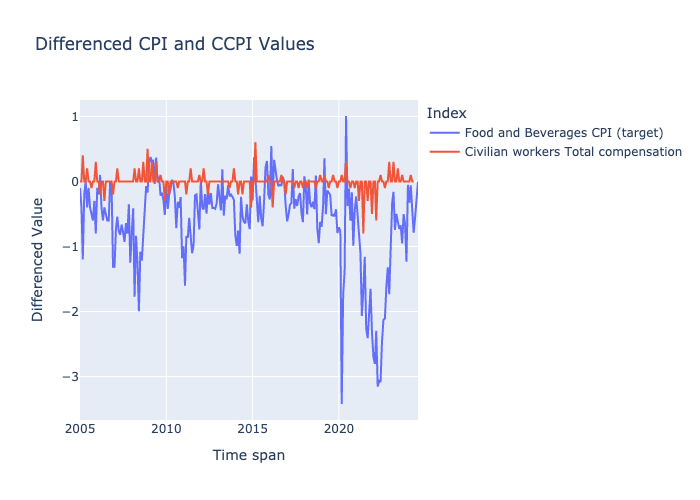

In [26]:
cpi_ccpi = df.iloc[:,6:8]

def differencing(x):
    result = np.array(np.zeros(len(x)))
    for i in range(1, len(x)):
        result[i] = x[i] - x[i - 1]
        
    return result

cpi_ccpi.iloc[:,0] = differencing(cpi_ccpi.iloc[:,0])
cpi_ccpi.iloc[:,1] = differencing(cpi_ccpi.iloc[:,1])

cpi_ccpi = cpi_ccpi.melt(value_name='Value', var_name = 'Index', value_vars=cpi_ccpi.columns, ignore_index=False)

fig = px.line(cpi_ccpi, x=cpi_ccpi.index, y='Value', color='Index', title='Differenced CPI and CCPI Values', labels={'Value': 'Differenced Value', 'date': 'Time span'})
fig.write_image(os.path.join(plot_folder, 'Differenced_CPI_and_CCPI.png'), width=1280, height=640)
fig.show()

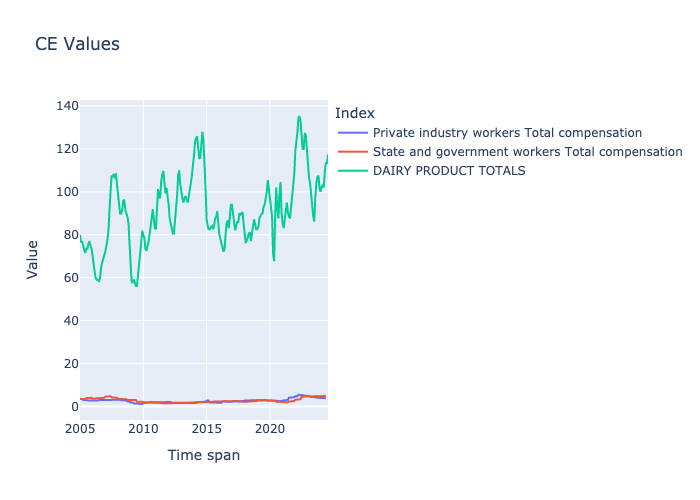

In [27]:
ce = df.iloc[:,8:11]
ce = ce.melt(value_name='Value', var_name = 'Index', value_vars=ce.columns, ignore_index=False)
fig = px.line(ce, x=ce.index, y='Value', color='Index', title='CE Values', labels={'Value': 'Value', 'date': 'Time span'})
fig.write_image(os.path.join(plot_folder, 'CE.png'), width=1280, height=640)
fig.show()